In [18]:
import cv2
import torch
import torchvision.transforms as transforms
import os
import matplotlib.pyplot as plt

In [32]:
data_dir = os.path.join('data','paddy-doctor-diseases-small')
img_path = os.path.join(data_dir,'bacterial_leaf_streak','PDD00650.jpg')
img = cv2.imread(img_path)

In [33]:
def show_image(title, img):
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()


In [34]:
def denoise_image(img):
    if len(img.shape) == 2:  # Grayscale
        return cv2.fastNlMeansDenoising(img, h=10)
    else:  # Color
        return cv2.fastNlMeansDenoisingColored(img, h=10)


In [39]:
def gaussian_blur(img, kernel_size=(3, 3), sigmaX=1):
    return cv2.GaussianBlur(img, kernel_size, sigmaX)

In [40]:
def histogram_equalization(img):
    if len(img.shape) == 2:  # Grayscale
        return cv2.equalizeHist(img)
    else:  # Color
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        channels = cv2.split(img)
        equalized_channels = [clahe.apply(ch) for ch in channels]
        return cv2.merge(equalized_channels)

In [45]:
def preprocess_pipeline(img):
    show_image("Original Image", img)

    img = denoise_image(img)
    show_image("Denoised Image", img)

    # img = gaussian_blur(img)
    # show_image("Blurred Image", img)

    img = histogram_equalization(img)
    show_image("Equalized Image", img)

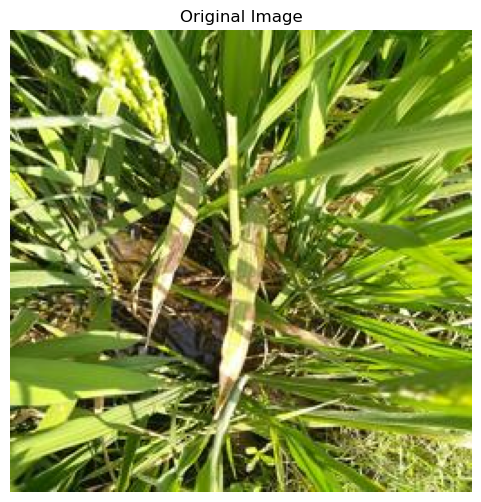

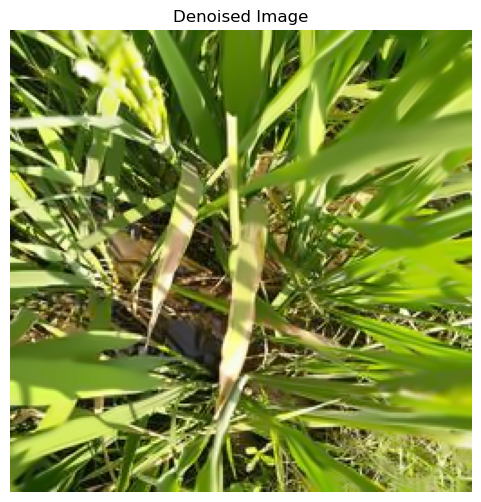

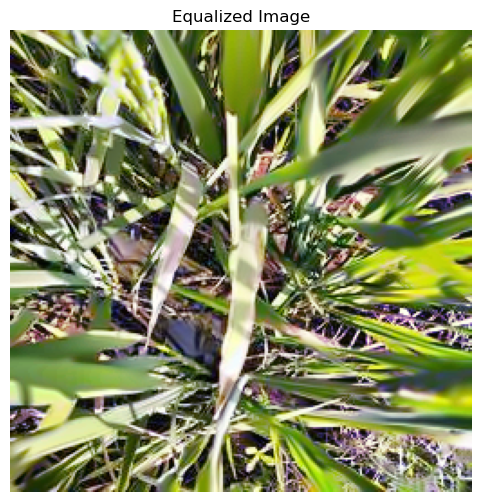

In [46]:
preprocess_pipeline(img)